In [102]:
from keras import models, layers
from keras.datasets import mnist
import numpy as np
import keras
import matplotlib.pyplot as plt

In [103]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

(<matplotlib.image.AxesImage at 0x2523f019be0>, 5)

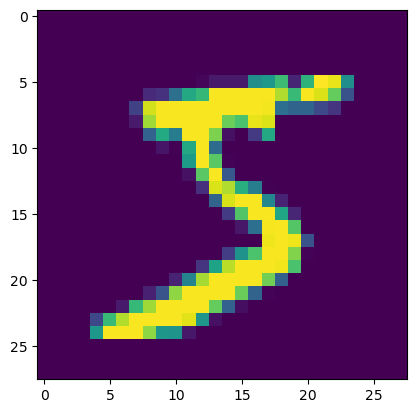

In [104]:
plt.imshow(x_train[0]), y_train[0]

# Data processing

In [105]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [106]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [107]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [108]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Model

In [109]:
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(32, kernel_size=(2, 2), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(num_classes, activation="softmax"))

In [110]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 27, 27, 32)        160       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 12, 12, 32)        4128      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 1152)              0         
                                                                 
 dense_9 (Dense)             (None, 10)              

In [111]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [112]:
history = model.fit(partial_x_train, partial_y_train, batch_size=128, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
391/391 [==============================] - 2s 4ms/step - loss: 0.4603 - accuracy: 0.8713 - val_loss: 0.1513 - val_accuracy: 0.9564
Epoch 2/20
391/391 [==============================] - 1s 4ms/step - loss: 0.1192 - accuracy: 0.9638 - val_loss: 0.1079 - val_accuracy: 0.9665
Epoch 3/20
391/391 [==============================] - 1s 4ms/step - loss: 0.0857 - accuracy: 0.9744 - val_loss: 0.0849 - val_accuracy: 0.9734
Epoch 4/20
391/391 [==============================] - 1s 4ms/step - loss: 0.0706 - accuracy: 0.9786 - val_loss: 0.0775 - val_accuracy: 0.9763
Epoch 5/20
391/391 [==============================] - 1s 4ms/step - loss: 0.0602 - accuracy: 0.9817 - val_loss: 0.0718 - val_accuracy: 0.9781
Epoch 6/20
391/391 [==============================] - 1s 4ms/step - loss: 0.0530 - accuracy: 0.9838 - val_loss: 0.0658 - val_accuracy: 0.9791
Epoch 7/20
391/391 [==============================] - 2s 4ms/step - loss: 0.0482 - accuracy: 0.9849 - val_loss: 0.0675 - val_accuracy: 0.9794
Epoch 

In [113]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.0483 - accuracy: 0.9848


[0.0483209528028965, 0.9847999811172485]

# Display performance curves

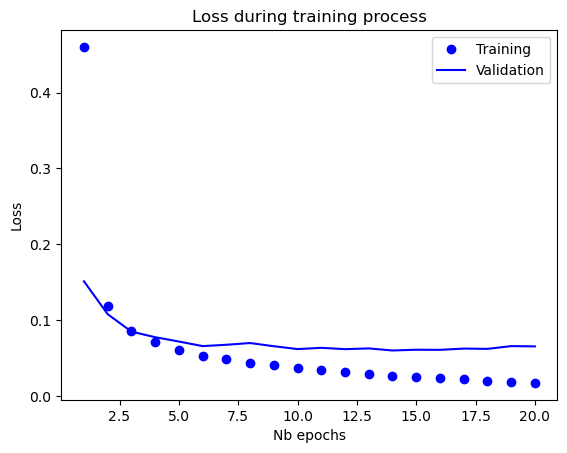

In [114]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 21)

plt.plot(epochs, loss_values, 'bo', label="Training")
plt.plot(epochs, val_loss_values, 'b', label="Validation")

plt.title("Loss during training process")
plt.xlabel("Nb epochs")
plt.ylabel("Loss")
plt.legend()

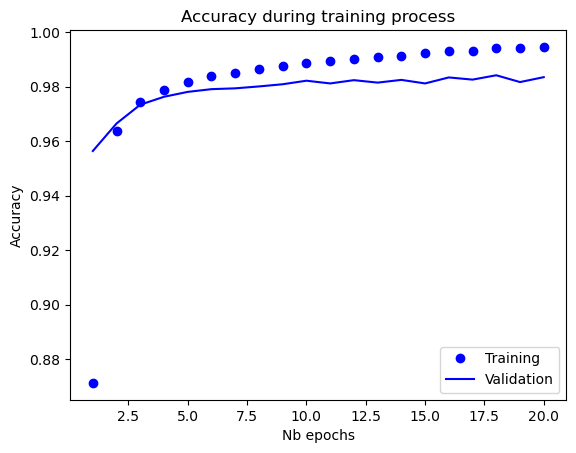

In [115]:
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, 21)

plt.plot(epochs, acc_values, 'bo', label="Training")
plt.plot(epochs, val_acc_values, 'b', label="Validation")

plt.title("Accuracy during training process")
plt.xlabel("Nb epochs")
plt.ylabel("Accuracy")
plt.legend()